# ДЗ-4

В этой работе вам предстоит закрепить основные команды взаимодействия с открытыми API.

За это задание можно получить до 8 баллов (включительно).

Код можно писать в нескольких ячейках.

## Задание "Карточные фокусы"

В этом задании вам предстоит взаимодействите с открытым API: `https://deckofcardsapi.com`

Основные эндпойнты:
1. Создать стопку из `N` колод кард по 52 карты каждая

`https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=N` (вместо `N` нужно вставить свое число)

После вызова метода будет возвращен `json`, из которого основной информацией будет значение по ключу `deck_id`


Пример: `get` запроса `"https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=3"` вернет
```json
{
    "success": true,
    "deck_id": "lcww1uui6bf6",
    "remaining": 156,
    "shuffled": true
}
```


2. Метод извлечения `N` карт из созданной колоды по `deck_id`


Пример: `get` запрос `https://deckofcardsapi.com/api/deck/lcww1uui6bf6/draw/?count=2` вернет
```json
{
    "success": true,
    "deck_id": "lcww1uui6bf6",
    "cards": [
        {
            "code": "7H",
            "image": "https://deckofcardsapi.com/static/img/7H.png",
            "images": {
                "svg": "https://deckofcardsapi.com/static/img/7H.svg",
                "png": "https://deckofcardsapi.com/static/img/7H.png"
            },
            "value": "7",
            "suit": "HEARTS"
        },
        {
            "code": "3C",
            "image": "https://deckofcardsapi.com/static/img/3C.png",
            "images": {
                "svg": "https://deckofcardsapi.com/static/img/3C.svg",
                "png": "https://deckofcardsapi.com/static/img/3C.png"
            },
            "value": "3",
            "suit": "CLUBS"
        }
    ],
    "remaining": 154
}
```

Обратите внимание, после извлечения карты не возвращаются в колоду.

### Описание структуры JSON

Основные поля `json` при создании колоды:
* remaining - количество карт, которые остались в колоде (уменьшается при извлечении)
* deck_id - идентификатор созданной колоды
* shuffled - флаг того, что колода перемешана или нет
* success - флаг того, что метод все завершилось корректно

При вызове метода на извлечение карт из колоды добавляются поля:
* cards - список извлеченных карт с описанием

Описание карты:
* code - код карты (составлен из номинала и первой буквы масти)
* image - ссылка на изображение в .png формате
* images - список других форматов изображений (.png и .svg)
* value - значение карты
* suit - масть

### Задача 1 (1 балл)

Напишите фупрограмму, которая запрашивает по API создание колоды из четырех мастей. Извлеките идентификатор колоды для дальнейшей работы и выведите структуру `json`, которая вам поступает в ответ, а таже статус-код.

In [ ]:
import requests

url = "https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=4"
response = requests.get(url)

print(f"Status: {response.status_code}")
print(response.json())

deck_id = response.json()['deck_id']
print(f"Deck ID: {deck_id}")

Status: 200
{'success': True, 'deck_id': 'p0pj4vy8ywky', 'remaining': 208, 'shuffled': True}
Deck ID: p0pj4vy8ywky


### Задача 2.1 (1 балл)

Извлеките из колоды десять карт. Рекомендуется использовать такой способ создания url ссылки, чтобы изменять отдельно параметры запроса

```python
deck_id = data['deck_id']
number_of_cards = 10

url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
```

In [ ]:
import requests
response = requests.get("https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=4")
data = response.json()
deck_id = data['deck_id']
print(f"Создана колода: {deck_id}")
print(f"Карт в колоде: {data['remaining']}")
number_of_cards = 10
url = f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count={number_of_cards}"
response = requests.get(url)
data = response.json()
print(f"\nИзвлечено {number_of_cards} карт:")
for card in data['cards']:
    print(f"{card['value']} {card['suit']} ({card['code']})")
print(f"\nОсталось карт: {data['remaining']}")

Создана колода: 262ibrosa648
Карт в колоде: 208

Извлечено 10 карт:
KING HEARTS (KH)
ACE SPADES (AS)
4 CLUBS (4C)
3 SPADES (3S)
7 SPADES (7S)
3 DIAMONDS (3D)
KING HEARTS (KH)
QUEEN SPADES (QS)
9 DIAMONDS (9D)
6 SPADES (6S)

Осталось карт: 198


### Задача 2.2 (2 балла)

Среди всех карт в `cards` соберите информацию о том, сколько карт каждой масти было вытянуто. Выведите это в консоль.

In [ ]:
import requests
deck_id = requests.get("https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=4").json()['deck_id']
cards = requests.get(f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count=10").json()['cards']
suits = {}
for card in cards:
    suit = card['suit']
    suits[suit] = suits.get(suit, 0) + 1
print("Распределение карт по мастям:")
for suit, count in suits.items():
    print(f"{suit}: {count} карт")

Распределение карт по мастям:
CLUBS: 3 карт
HEARTS: 3 карт
SPADES: 3 карт
DIAMONDS: 1 карт


### Задача 2.3 (1 балл)

Определите наибольший номинал среди вытащенныз карт и ее масть.

In [ ]:
import requests
deck_id = requests.get("https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=4").json()['deck_id']
cards = requests.get(f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count=10").json()['cards']
values = {'2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, '10': 10,
          'JACK': 11, 'QUEEN': 12, 'KING': 13, 'ACE': 14}
max_card = max(cards, key=lambda card: values[card['value']])
print(f"Наибольший номинал: {max_card['value']} {max_card['suit']}")

Наибольший номинал: QUEEN DIAMONDS


### Задача 2.4 (2 балла)

Повторите еще десять извлечений по 10 карт. Создайте датафрейм в `pandas`, в котором столбцами будут названия мастей, а в строках - количество вытянутых карт каждой масти соответственно.


Постройте накопительную диаграмму по вытянутым значениям. Код ниже как раз строит такую диаграмму.

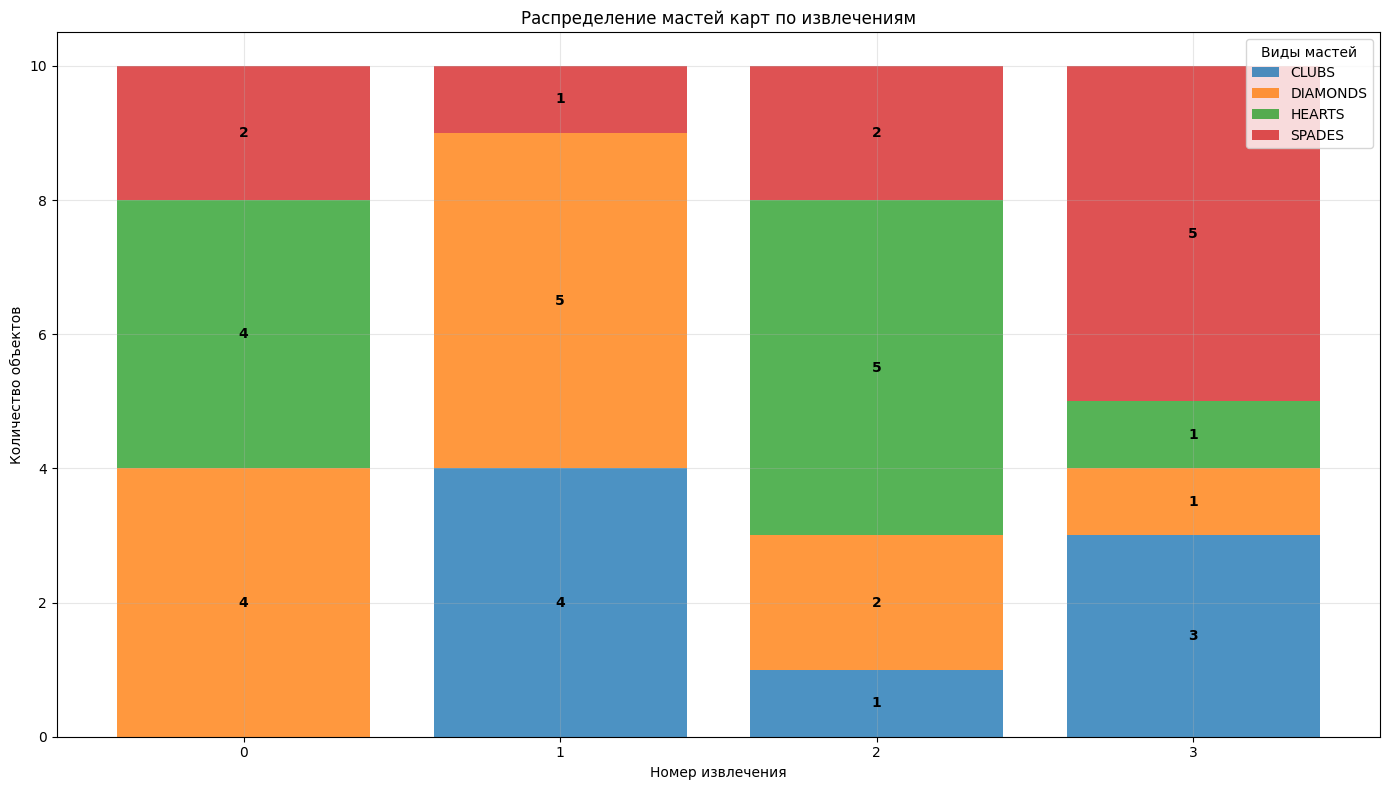

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Достаточно в коде поменять демонстрационный датафрейм на тот,
# который создадите вы.

df = pd.DataFrame({
    'CLUBS': [0, 4, 1, 3],
    'DIAMONDS': [4, 5, 2, 1],
    'HEARTS': [4, 0, 5, 1],
    'SPADES': [2, 1, 2, 5]
})
object_types = df.keys()

# Построение stacked bar chart
plt.figure(figsize=(14, 8))

x = df.index
bottom = np.zeros(len(df))

for i, obj_type in enumerate(object_types):
    plt.bar(x, df[obj_type], bottom=bottom, label=obj_type, alpha=0.8)

    # Добавляем подписи значений
    for j, (measurement, value) in enumerate(zip(x, df[obj_type])):
        if value > 0:
            plt.text(measurement, bottom[j] + value/2, str(value),
                    ha='center', va='center', fontweight='bold', fontsize=10)

    bottom += df[obj_type].values

plt.xlabel('Номер извлечения')
plt.ylabel('Количество объектов')
plt.title('Распределение мастей карт по извлечениям')
plt.legend(title='Виды мастей')
plt.grid(True, alpha=0.3)
plt.xticks(x)

plt.tight_layout()
plt.show()

   HEARTS  DIAMONDS  CLUBS  SPADES
0       2         2      1       5
1       4         3      1       2
2       4         1      2       3
3       3         2      3       2
4       1         1      4       4
5       0         5      2       3
6       2         2      3       3
7       0         2      5       3
8       3         2      3       2
9       1         2      3       4


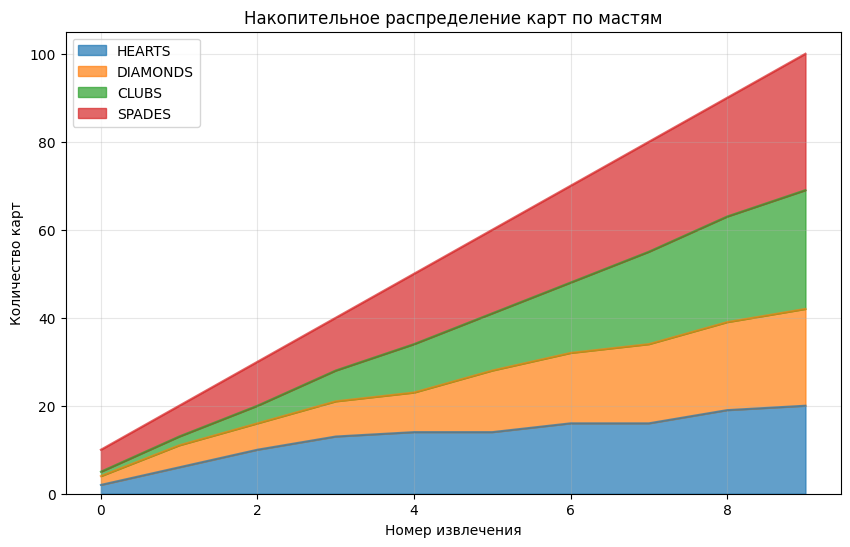

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

deck_id = requests.get("https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=4").json()['deck_id']

results = []
for i in range(10):
    cards = requests.get(f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count=10").json()['cards']
    suits = [card['suit'] for card in cards]
    results.append({suit: suits.count(suit) for suit in ['HEARTS', 'DIAMONDS', 'CLUBS', 'SPADES']})

df = pd.DataFrame(results)
print(df)

df.cumsum().plot(kind='area', alpha=0.7, figsize=(10, 6))
plt.title('Накопительное распределение карт по мастям')
plt.xlabel('Номер извлечения')
plt.ylabel('Количество карт')
plt.grid(True, alpha=0.3)
plt.show()

### Задача 2.5 (1 балл)

На основе данный в предыдущем пункте, постройте график частоты встречаемости для каждой масти по измерениям, т.е. поделите количество на 10 и построить графики.

Частоты встречаемости карт по мастям:
   HEARTS  DIAMONDS  CLUBS  SPADES
0     0.3       0.0    0.4     0.3
1     0.3       0.1    0.4     0.2
2     0.2       0.2    0.2     0.4
3     0.2       0.3    0.3     0.2
4     0.0       0.1    0.3     0.6
5     0.5       0.2    0.1     0.2
6     0.1       0.4    0.3     0.2
7     0.2       0.1    0.3     0.4
8     0.3       0.1    0.3     0.3
9     0.4       0.1    0.3     0.2


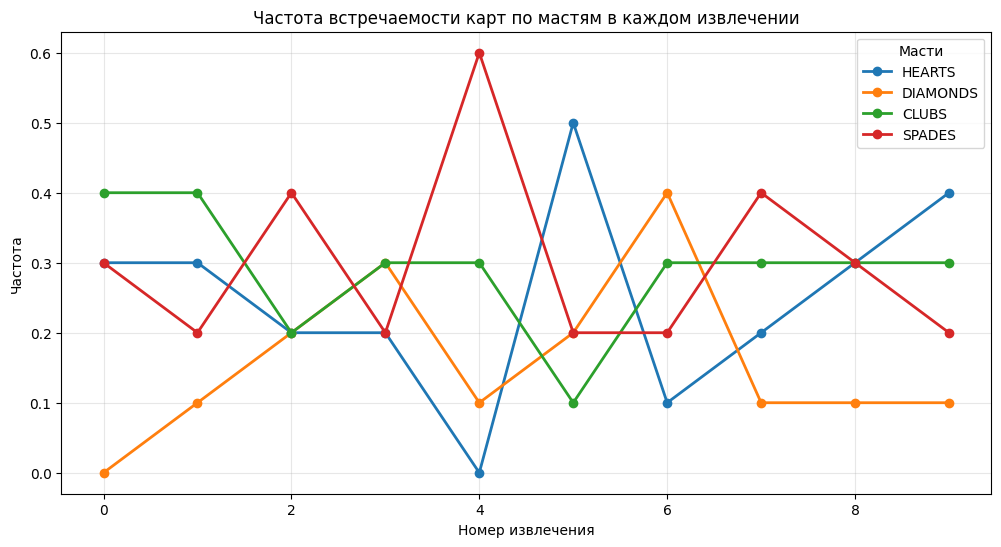

In [ ]:
import requests
import pandas as pd
import matplotlib.pyplot as plt
deck_id = requests.get("https://deckofcardsapi.com/api/deck/new/shuffle/?deck_count=4").json()['deck_id']
results = []
for i in range(10):
    cards = requests.get(f"https://deckofcardsapi.com/api/deck/{deck_id}/draw/?count=10").json()['cards']
    suits = [card['suit'] for card in cards]
    results.append({suit: suits.count(suit) for suit in ['HEARTS', 'DIAMONDS', 'CLUBS', 'SPADES']})
df = pd.DataFrame(results)
df_freq = df / 10
print("Частоты встречаемости карт по мастям:")
print(df_freq)
df_freq.plot(kind='line', figsize=(12, 6), marker='o', linewidth=2)
plt.title('Частота встречаемости карт по мастям в каждом извлечении')
plt.xlabel('Номер извлечения')
plt.ylabel('Частота')
plt.grid(True, alpha=0.3)
plt.legend(title='Масти')
plt.show()